In [40]:
import pandas as pd

train = pd.read_csv("csv/train.csv")
test = pd.read_csv("csv/test.csv")

train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [42]:
# Fill missing age with median
train['Age'].fillna(train['Age'].median(), inplace=True)

# Fill embarked with mode
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)



C:\Users\pixel system\AppData\Local\Temp\ipykernel_19428\1468267665.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)
C:\Users\pixel system\AppData\Local\Temp\ipykernel_19428\1468267665.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

In [68]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

train['Sex'] = le.fit_transform(train['Sex'])        # male: 1, female: 0
train['Embarked'] = le.fit_transform(train['Embarked'])  # S:2, C:0, Q:1


In [44]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = train[features]
y = train['Survived']


In [45]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()
model_dt.fit(X, y)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [74]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

y_pred = model_dt.predict(X_val)

print("Accuracy:", accuracy_score(y_val, y_pred))


Accuracy: 0.7597765363128491


In [77]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_val)

print("Random Forest Accuracy:", accuracy_score(y_val, y_pred_rf))
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_val)

print("Random Forest Accuracy:", accuracy_score(y_val, y_pred_rf))


Random Forest Accuracy: 0.770949720670391
Random Forest Accuracy: 0.776536312849162


In [53]:
test['Age'].fillna(test['Age'].median(), inplace=True)
test['Fare'].fillna(test['Fare'].median(), inplace=True)
test['Sex'] = le.fit_transform(test['Sex'])
test['Embarked'] = le.fit_transform(test['Embarked'].fillna('S'))

X_test = test[features]
predictions = model_rf.predict(X_test)


C:\Users\pixel system\AppData\Local\Temp\ipykernel_19428\3024608131.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Age'].fillna(test['Age'].median(), inplace=True)
C:\Users\pixel system\AppData\Local\Temp\ipykernel_19428\3024608131.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [54]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)


In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
train = pd.read_csv("csv/train.csv")

# Clean basic missing data for plots
train['Age'].fillna(train['Age'].median(), inplace=True)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)


C:\Users\pixel system\AppData\Local\Temp\ipykernel_19428\3859913684.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)
C:\Users\pixel system\AppData\Local\Temp\ipykernel_19428\3859913684.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

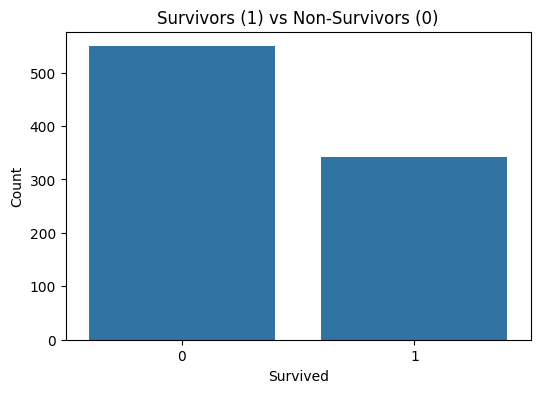

In [59]:
plt.figure(figsize=(6,4))
sns.countplot(data=train, x='Survived')
plt.title("Survivors (1) vs Non-Survivors (0)")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()


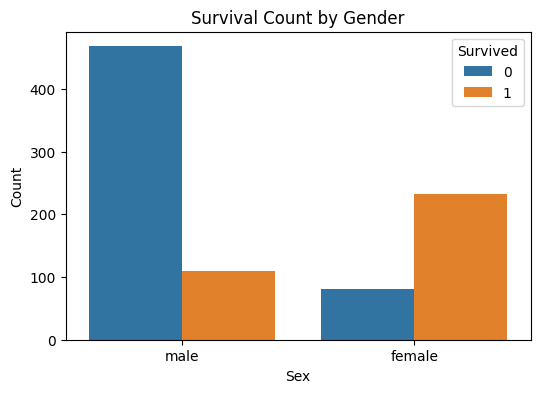

In [61]:
plt.figure(figsize=(6,4))
sns.countplot(data=train, x='Sex', hue='Survived')
plt.title("Survival Count by Gender")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(title='Survived')
plt.show()


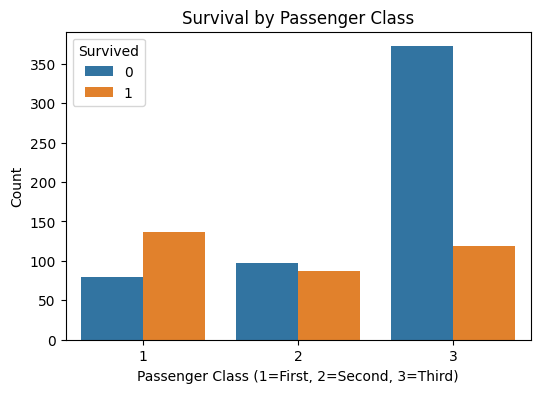

In [62]:
plt.figure(figsize=(6,4))
sns.countplot(data=train, x='Pclass', hue='Survived')
plt.title("Survival by Passenger Class")
plt.xlabel("Passenger Class (1=First, 2=Second, 3=Third)")
plt.ylabel("Count")
plt.legend(title='Survived')
plt.show()


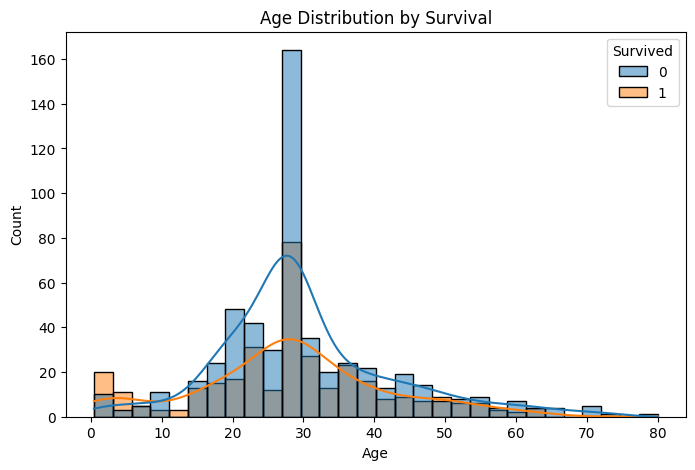

In [64]:
plt.figure(figsize=(8,5))
sns.histplot(data=train, x='Age', hue='Survived', bins=30, kde=True)
plt.title("Age Distribution by Survival")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


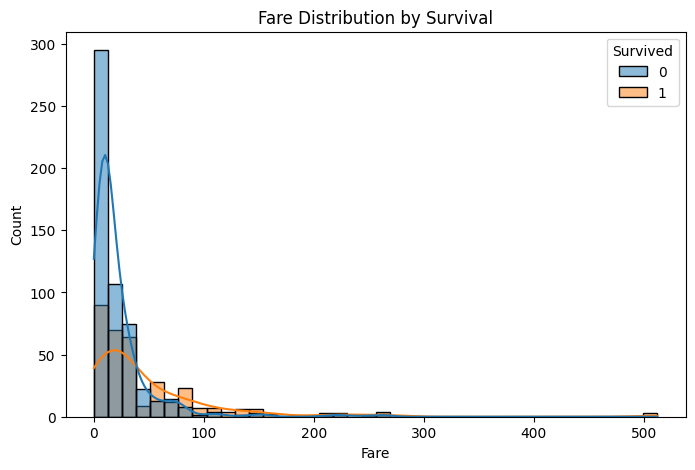

In [65]:
plt.figure(figsize=(8,5))
sns.histplot(data=train, x='Fare', hue='Survived', bins=40, kde=True)
plt.title("Fare Distribution by Survival")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()
